First, import relevant modules and configure ``matplotlib`` to generate plots inline. The submodule `scipy.integrate` contains a number of routines to compute integrals numerically.

In [1]:
import numpy as np
import matplotlib.pylab as mpl
%matplotlib inline

# Quadrature using `scipy`

In the following example, an explicit integrand (notably $\cos^2(e^x)$) is defined as a *lambda function* that is passed to the quadrature routine `scipy.integrate.quad` for evaluation. The quadrature routine adaptively chooses quadrature points based on an error estimator; where the error estimate for the integral over a given subinterval is too large, the subinterval is subdivided recursively and the approximate integral recomputed on each subinterval until the total error estimate is below a prescribed tolerance. Notice that this quadrature routine expects a function $f$ as input that can be evaluated at any quadrature point in the domain. Given the oscillatory nature of the integrand toward the right end of the interval, more quadrature points are required there.

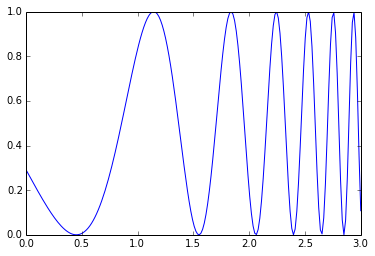

0.107974513298


In [2]:
fun = lambda x: np.cos(np.exp(x))**2 # define as a one-line "lambda" function
a = 0
b = 3
x = np.linspace(a,b,200)
y = fun(x)
mpl.plot(x,y)
mpl.show()
print fun(b)

In [3]:
from scipy.integrate import quad
(I_val, err) = quad(fun, 0, 3) # Notice return value is a Python *tuple* (here an ordered pair)
print "Approximate value of integral is %15.13g with error estimate %15.10g" % (I_val,err)

Approximate value of integral is  1.296467785724 with error estimate 1.397797186e-09


As another alternative, the routine `scipy.integrate.trapz` accepts numerical data in arrays as inputs and computes a trapezoidal approximation of a different integral. An analytical integrand is chosen and defined below as a lambda function for comparison. The numerical data is obtained by randomly drawing numbers from a Gaussian distribution and using those values (scaled and translated) as quadrature points from which to build up a trapezoidal approximation of an integral.

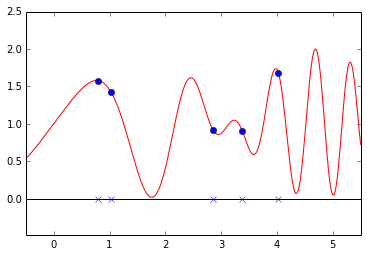

length = 5


In [4]:
(a,b) = (0,5)  # Observe use of tuple for multiple assignment statements
N = 5
xdat = np.unique(np.sort(np.random.rand(N) * (b-a) + a)) # random ordinates uniformly sampled from a to b
fun = lambda x: np.sin(x) * np.cos(x**2) + 1
ydat = fun(xdat)
# Generate plot on slighlty wider axes
delta = 0.1*(b-a)
x = np.linspace(a-delta,b+delta,301)
y = fun(x)
mpl.plot(x,y,'r-',xdat,ydat,'bo',xdat,0*xdat,'bx')
mpl.plot([x.min(),x.max()],[0.,0.],'k-')
mpl.xlim((x.min(),x.max()))
mpl.ylim((y.min()-delta,y.max()+delta))
mpl.show()
print "length = %s" % len(xdat)

In [6]:
(fun_solution, err_fun) = quad(fun, 0, 5) # quad requires a callable function as an argument
from scipy.integrate import trapz
dat_solution = trapz(ydat, xdat)          # trapz requires numerical data
print 'Solution obtained by adaptive quadrature: %s' % str(fun_solution)
print 'Trapezoidal solution obtained using random samples: %s' % str(dat_solution)
print "Relative error: %s" % str(abs(fun_solution-dat_solution)/fun_solution)

Solution obtained by adaptive quadrature: 5.10034506754
Trapezoidal solution obtained using random samples: 3.79469295999
Relative error: 0.255992896611


Trapezoidal quadrature is obviously less accurate in this instance (because the sample points were randomly assigned), but it is more useful when working with sampled data (e.g., data from a sensor of some kind or time series data).